# 1. Install Dependencies and Setup

In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
    Running setup.py install for tensorflow-gpu: started
    Running setup.py install for tensorflow-gpu: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'd:\imageclassification\imageclasskernel\scripts\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\irems\\AppData\\Local\\Temp\\pip-install-7t_bf82m\\tensorflow-gpu\\setup.py'"'"'; __file__='"'"'C:\\Users\\irems\\AppData\\Local\\Temp\\pip-install-7t_bf82m\\tensorflow-gpu\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\irems\AppData\Local\Temp\pip-wheel-58jhad61'
       cwd: C:\Users\irems\AppData\Local\Temp\pip-install-7t_bf82m\tensorflow-gpu\
  Complete output (17 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\irems\AppData\Local\Temp\pip-install-7t_bf82m\tensorflow-gpu\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" pack

In [3]:
pip install tensorflow  opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\ImageClassification\imageclasskernel\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
!pip list

Package                      Version
---------------------------- ------------
absl-py                      2.0.0
astunparse                   1.6.3
attrs                        23.1.0
backcall                     0.2.0
cachetools                   5.3.2
certifi                      2023.11.17
charset-normalizer           3.3.2
colorama                     0.4.6
cycler                       0.11.0
debugpy                      1.7.0
decorator                    5.1.1
entrypoints                  0.4
flatbuffers                  23.5.26
fonttools                    4.38.0
gast                         0.4.0
google-auth                  2.25.2
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.60.0
h5py                         3.8.0
idna                         3.6
importlib-metadata           6.7.0
ipykernel                    6.16.2
ipython                      7.34.0
jedi                         0.19.1
joblib                       1.3.2


You should consider upgrading via the 'd:\imageclassification\imageclasskernel\scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
import tensorflow as tf
import os

# 2. Remove dodgy images

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data' 

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\cloudy\cloudy22.jpg
Image not in ext list data\shine\shine131.jpg


# 3. Load Data

In [9]:
import numpy as np 

Found 13173 files belonging to 12 classes.


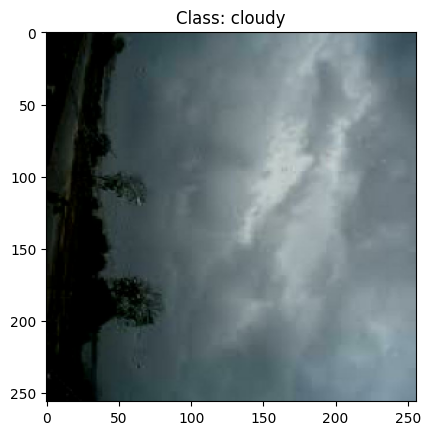

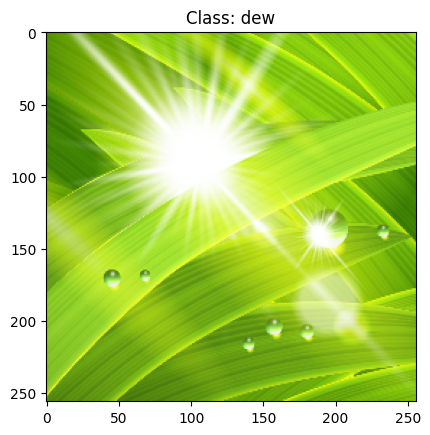

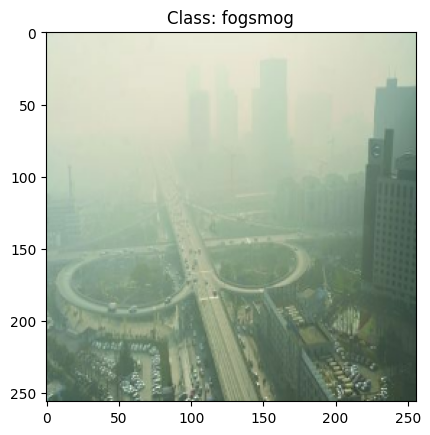

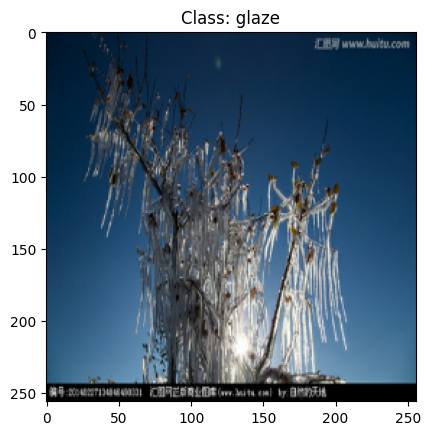

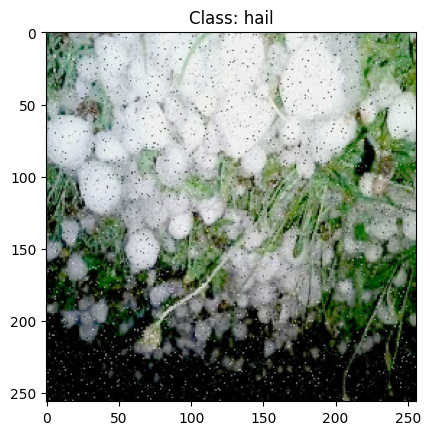

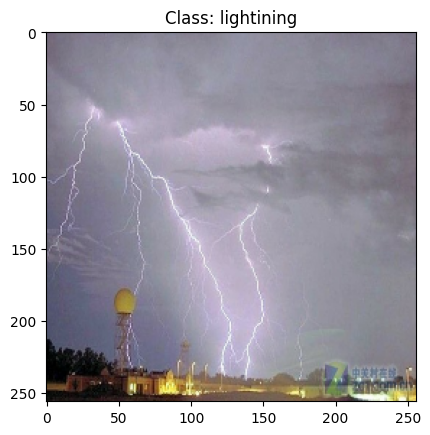

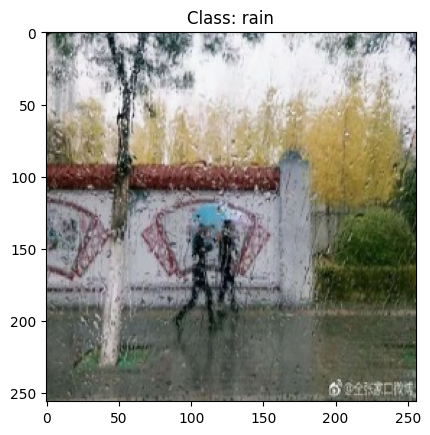

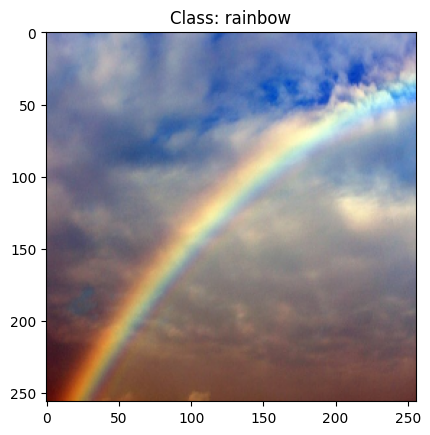

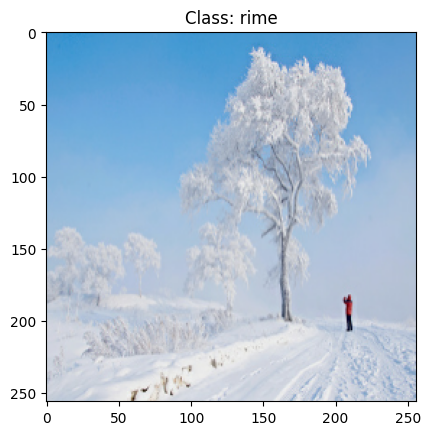

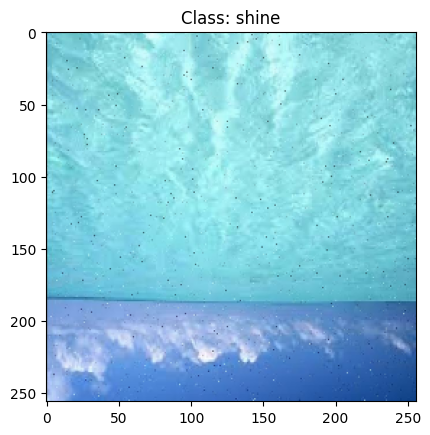

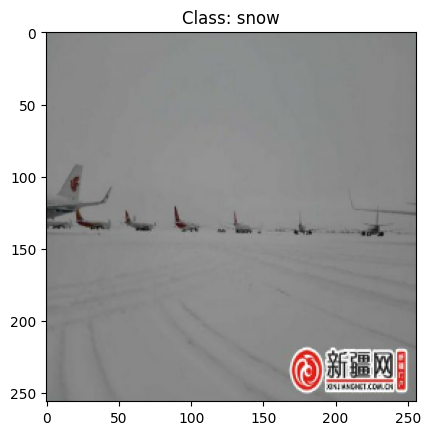

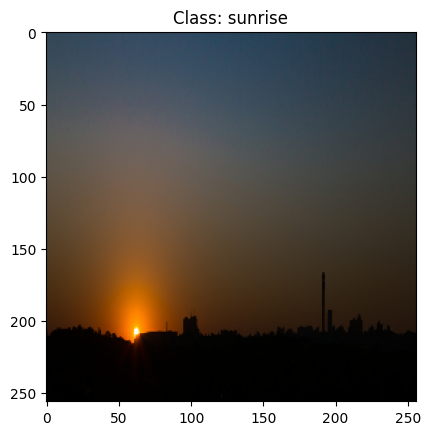

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

data_dir = 'data'
class_labels = ['cloudy', 'dew', 'fogsmog', 'glaze', 'hail', 'lightining', 'rain', 'rainbow', 'rime','shine', 'snow', 'sunrise']

# Veri kümesini oluştur
data = tf.keras.utils.image_dataset_from_directory(data_dir)

# Veri kümesinin bir örnek batch'ini alma
batch = next(iter(data))

# Batch içindeki görüntüler ve etiketler
images, labels = batch

# Her bir sınıf için ilk görüntüyü gösterme
for class_index, class_label in enumerate(class_labels):
    class_indices = tf.where(labels == class_index).numpy().flatten()
    if len(class_indices) > 0:
        image_for_class = images[class_indices[0]]
        plt.imshow(image_for_class.numpy().astype(int))
        plt.title(f'Class: {class_label}')
        plt.show()


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

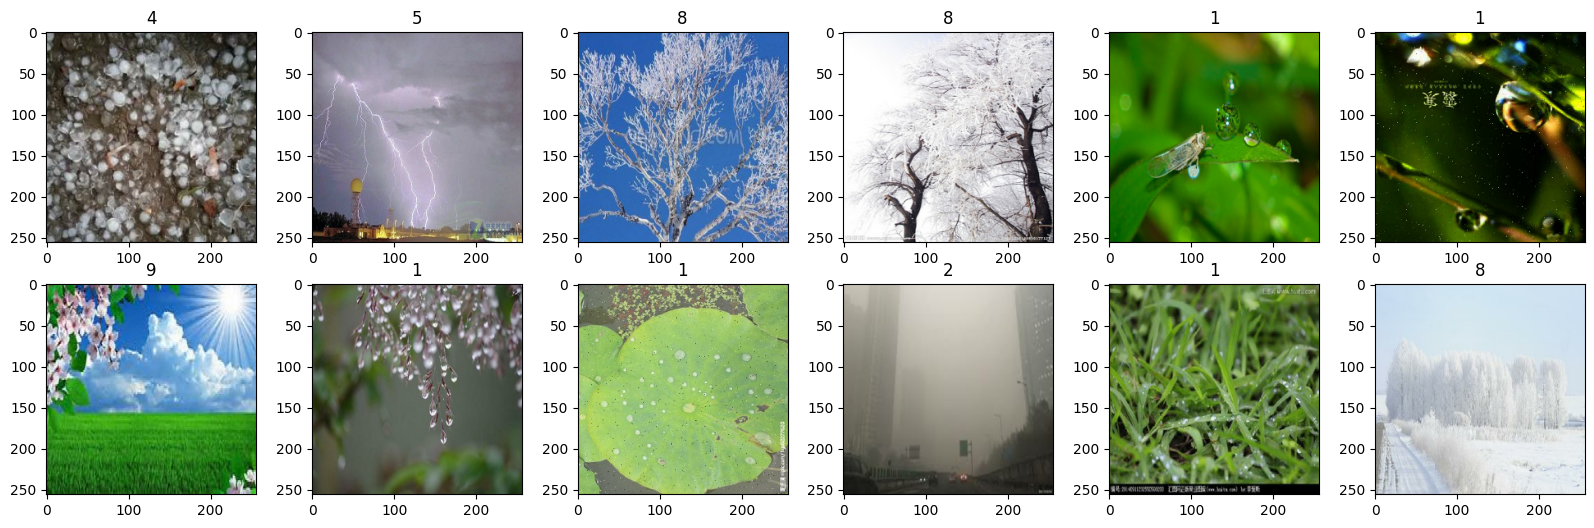

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(20, 6))

# Veri kümesinden 12 resmi gösterme
for i in range(2):
    for j in range(6):
        img_index = i * 6 + j
        if img_index < 12:
            ax[i, j].imshow(batch[0][img_index].astype(int))
            ax[i, j].title.set_text(batch[1][img_index])

plt.show()


# 4. Scale Data

In [14]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [15]:
# Veri setini normalize etme ve one-hot encoding uygulama
data = data.map(lambda x, y: (x / 255, tf.one_hot(y, depth=12)))


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [16]:
data.as_numpy_iterator().next() 

(array([[[[1.09803922e-01, 7.05882385e-02, 1.13725491e-01],
          [1.09803922e-01, 7.05882385e-02, 1.13725491e-01],
          [1.09803922e-01, 7.05882385e-02, 1.13725491e-01],
          ...,
          [1.21568628e-01, 1.01960786e-01, 1.88235298e-01],
          [1.18627451e-01, 9.90196094e-02, 1.85294122e-01],
          [1.16666667e-01, 9.70588252e-02, 1.83333337e-01]],
 
         [[1.09803922e-01, 7.05882385e-02, 1.13725491e-01],
          [1.09803922e-01, 7.05882385e-02, 1.13725491e-01],
          [1.09803922e-01, 7.05882385e-02, 1.13725491e-01],
          ...,
          [1.21568628e-01, 1.01960786e-01, 1.88235298e-01],
          [1.18627451e-01, 9.90196094e-02, 1.85294122e-01],
          [1.16666667e-01, 9.70588252e-02, 1.83333337e-01]],
 
         [[1.09803922e-01, 7.05882385e-02, 1.13725491e-01],
          [1.09803922e-01, 7.05882385e-02, 1.13725491e-01],
          [1.09803922e-01, 7.05882385e-02, 1.13725491e-01],
          ...,
          [1.21568628e-01, 1.01960786e-01, 1.8823

# 5. Split Data

In [17]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train_size

288

In [19]:
val_size

82

In [20]:
test_size

41

In [105]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [22]:
from collections import Counter
class_labels = ['cloudy', 'dew', 'fogsmog', 'glaze', 'hail', 'lightining', 'rain', 'rainbow', 'rime', 'shine', 'snow', 'sunrise']

# Train setindeki sınıfların örnek sayıları
train_class_counts = Counter([class_labels[np.argmax(label.numpy())] for _, label in train])

# Test setindeki sınıfların örnek sayıları
test_class_counts = Counter([class_labels[np.argmax(label.numpy())] for _, label in test])

print("Train seti sınıf örnek sayıları:")
print(train_class_counts)

print("\nTest seti sınıf örnek sayıları:")
print(test_class_counts)


Train seti sınıf örnek sayıları:
Counter({'lightining': 38, 'rain': 38, 'sunrise': 31, 'cloudy': 27, 'hail': 26, 'dew': 25, 'rime': 23, 'shine': 20, 'snow': 17, 'fogsmog': 16, 'rainbow': 14, 'glaze': 13})

Test seti sınıf örnek sayıları:
Counter({'lightining': 9, 'sunrise': 6, 'fogsmog': 5, 'rime': 5, 'rain': 4, 'hail': 4, 'shine': 3, 'snow': 2, 'rainbow': 2, 'dew': 1})


# 6. Build Deep Learning Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization

In [24]:
num_classes = 12 # Toplam sınıf sayısı


In [25]:
model = Sequential()

model.add(BatchNormalization(input_shape=(256, 256, 3)))

# Convolutional Block 1
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.50))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

In [27]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 256, 256, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0

# 7. Train

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [33]:
hist = model.fit(train, epochs=50, validation_data=val,  callbacks=[tensorboard_callback, early_stopping])

Epoch 1/50
288/288 [==============================] - 527s 2s/step - loss: 2.2281 - accuracy: 0.3023 - val_loss: 1.9424 - val_accuracy: 0.4177
Epoch 2/50
288/288 [==============================] - 523s 2s/step - loss: 1.7307 - accuracy: 0.4178 - val_loss: 1.3459 - val_accuracy: 0.6029
Epoch 3/50
288/288 [==============================] - 519s 2s/step - loss: 1.4881 - accuracy: 0.4880 - val_loss: 1.3419 - val_accuracy: 0.6326
Epoch 4/50
288/288 [==============================] - 519s 2s/step - loss: 1.2955 - accuracy: 0.5495 - val_loss: 1.1081 - val_accuracy: 0.6681
Epoch 5/50
288/288 [==============================] - 519s 2s/step - loss: 1.1653 - accuracy: 0.5850 - val_loss: 0.9828 - val_accuracy: 0.7161
Epoch 6/50
288/288 [==============================] - 516s 2s/step - loss: 1.0263 - accuracy: 0.6291 - val_loss: 0.9620 - val_accuracy: 0.7130
Epoch 7/50
288/288 [==============================] - 517s 2s/step - loss: 0.9632 - accuracy: 0.6472 - val_loss: 0.9202 - val_accuracy: 0.7306

In [38]:
from keras.callbacks import TensorBoard
import time
kerasboard = TensorBoard(log_dir="/tmp/tensorboard/{}".format(time),
                        batch_size=32,
                        histogram_freq=1,
                        write_grads=True)

In [39]:
print("tensorboard --logdir="+kerasboard.log_dir)

tensorboard --logdir=/tmp/tensorboard/<module 'time' (built-in)>


# 8. Plot Performance

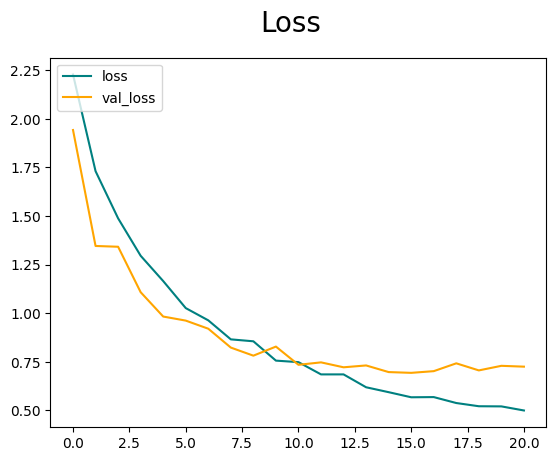

In [40]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

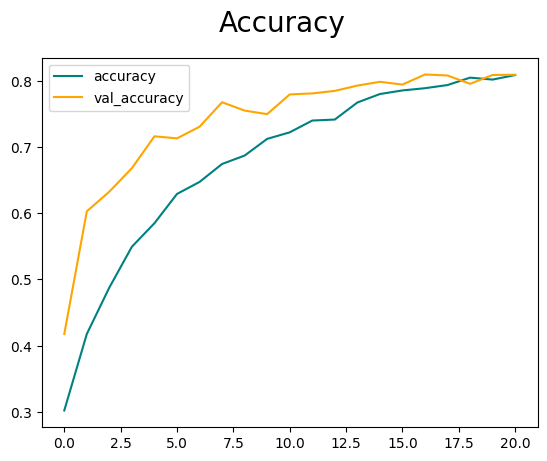

In [41]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [42]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Accuracy

In [71]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

# Reset states to clear previous values
pre.reset_states()
re.reset_states()
acc.reset_states()

# Evaluate the model on the validation dataset
for inputs, targets in val:
    predictions = model(inputs)
    pre.update_state(targets, predictions)
    re.update_state(targets, predictions)
    acc.update_state(targets, predictions)

# Get the final values
precision_value = pre.result().numpy()
recall_value = re.result().numpy()
accuracy_value = acc.result().numpy()

# Print the values
print(f'Precision: {precision_value}')
print(f'Recall: {recall_value}')
print(f'Categorical Accuracy: {accuracy_value}')

Precision: 0.8613556623458862
Recall: 0.745807945728302
Categorical Accuracy: 0.8006860017776489


In [72]:
num_classes =12
precisions = [Precision() for _ in range(num_classes)]
recalls = [Recall() for _ in range(num_classes)]
accuracies = [CategoricalAccuracy() for _ in range(num_classes)]

# Reset states to clear previous values
for metric in precisions + recalls + accuracies:
    metric.reset_states()

# Evaluate the model on the validation dataset
for inputs, targets in val:
    predictions = model(inputs)

    # Update metrics for each class
    for i in range(num_classes):
        precisions[i].update_state(targets[:, i], predictions[:, i])
        recalls[i].update_state(targets[:, i], predictions[:, i])
        accuracies[i].update_state(targets[:, i], predictions[:, i])

# Print the final values for each class
for i in range(num_classes):
    precision_value = precisions[i].result().numpy()
    recall_value = recalls[i].result().numpy()
    accuracy_value = accuracies[i].result().numpy()

    print(f'Class {i + 1}: Precision: {precision_value}, Recall: {recall_value}, Accuracy: {accuracy_value}')


Class 1: Precision: 0.8543689250946045, Recall: 0.7457627058029175, Accuracy: 0.40243902802467346
Class 2: Precision: 0.9780219793319702, Recall: 0.8240740895271301, Accuracy: 0.4268292784690857
Class 3: Precision: 0.841176450252533, Recall: 0.7606382966041565, Accuracy: 0.46341463923454285
Class 4: Precision: 0.7669903039932251, Recall: 0.6171875, Accuracy: 0.46341463923454285
Class 5: Precision: 0.8211008906364441, Recall: 0.7336065769195557, Accuracy: 0.31707316637039185
Class 6: Precision: 0.95703125, Recall: 0.9210526347160339, Accuracy: 0.3414634168148041
Class 7: Precision: 0.746268630027771, Recall: 0.7092198729515076, Accuracy: 0.32926830649375916
Class 8: Precision: 0.7903226017951965, Recall: 0.532608687877655, Accuracy: 0.32926830649375916
Class 9: Precision: 0.8218390941619873, Recall: 0.6137338876724243, Accuracy: 0.5487805008888245
Class 10: Precision: 0.903030276298523, Recall: 0.7563451528549194, Accuracy: 0.4390243887901306
Class 11: Precision: 0.7414966225624084, Rec

In [108]:
test = data.skip(train_size + val_size).take(test_size)

In [29]:
model.load_weights('D:\ImageClassification\models\sonModel.h5')

In [109]:
accuracy_metric = Accuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    acc.update_state(y, yhat)
    accuracy_metric.update_state(tf.argmax(y, axis=1), tf.argmax(yhat, axis=1))


test_accuracy = accuracy_metric.result().numpy()
print(f'Test Accuracy: {test_accuracy}')

1/1 [==============================] - 0s 318ms/step
Test Accuracy: 0.7888719439506531


In [75]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.86135566, shape=(), dtype=float32) tf.Tensor(0.74580795, shape=(), dtype=float32) tf.Tensor(0.7954776, shape=(), dtype=float32)


# 10. Test

In [76]:
import cv2
import matplotlib.pyplot as plt

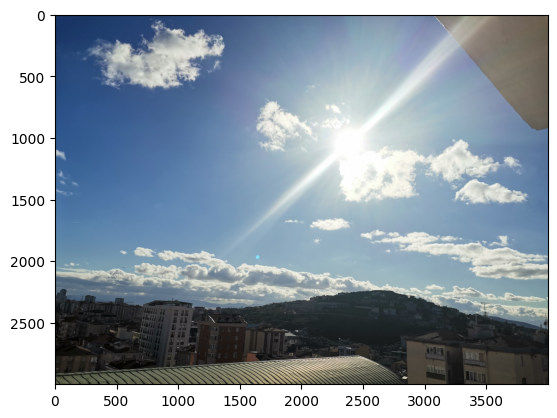

In [93]:
# Görüntüyü okuma ve uygun formatta yükleme
img = cv2.imread('denemeVeri/benimCektigim2.jpg')

# Görüntü boş mu kontrolü
if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV, görüntüyü BGR formatında okur, bu nedenle RGB'ye dönüştürüyoruz

    # Görüntüyü gösterme
    plt.imshow(img)
    plt.show()
else:
    print("Görüntü yüklenemedi.")

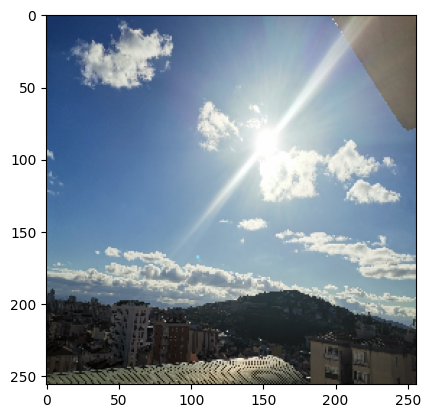

In [94]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [79]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 141ms/step


In [80]:
yhat

array([[9.5617723e-01, 1.6507495e-04, 2.8573347e-03, 6.6070793e-06,
        1.1323244e-04, 8.7854061e-03, 3.1502094e-02, 3.5412010e-04,
        2.6597079e-06, 1.3931421e-05, 1.9946763e-05, 2.4225922e-06]],
      dtype=float32)

In [95]:
img_path = 'denemeVeri/benimCektigim2.jpg'
img = cv2.imread(img_path)

if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resize = tf.image.resize(img, (256, 256))
    resize = np.expand_dims(resize / 255, 0)  

else:
    print(f"Error: Unable to read the image at {img_path}")


In [96]:
class_names = ['cloudy', 'dew', 'fogsmog', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'shine', 'snow', 'sunrise']
predictions = model.predict(resize)
predicted_class = np.argmax(predictions, axis=-1)

# Print some debug information
print(f'Predicted class indices: {predicted_class}')
if 0 <= predicted_class[0] < len(class_names):
    predicted_class_label = class_names[predicted_class[0]]
    print(f'Predicted class: {predicted_class_label}')
else:
    print('Error: Predicted class index is out of range.')

# Print class probabilities
for i, prob in enumerate(predictions[0]):
    class_label = class_names[i]
    print(f'Probability for class {class_label}: {prob}')


1/1 [==============================] - 0s 59ms/step
Predicted class indices: [0]
Predicted class: cloudy
Probability for class cloudy: 0.6430457234382629
Probability for class dew: 0.0002171215892303735
Probability for class fogsmog: 2.820463305397425e-05
Probability for class glaze: 1.4026606720562995e-07
Probability for class hail: 0.005086839664727449
Probability for class lightning: 0.035157352685928345
Probability for class rain: 0.0001477619807701558
Probability for class rainbow: 0.26648378372192383
Probability for class rime: 2.7971734652965097e-06
Probability for class shine: 0.04973107576370239
Probability for class snow: 3.365623513218452e-07
Probability for class sunrise: 9.893994138110429e-05


# 11. Save the Model

In [97]:
from tensorflow.keras.models import load_model

In [98]:
model.save(os.path.join('models','sonModel.h5'))

In [99]:
new_model = load_model('D:\ImageClassification\models\sonModel.h5')

In [100]:
new_model.predict(np.expand_dims(resize/255, 0))


ValueError: in user code:

    File "D:\ImageClassification\imageclasskernel\lib\site-packages\keras\engine\training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "D:\ImageClassification\imageclasskernel\lib\site-packages\keras\engine\training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\ImageClassification\imageclasskernel\lib\site-packages\keras\engine\training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "D:\ImageClassification\imageclasskernel\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
        return self(x, training=False)
    File "D:\ImageClassification\imageclasskernel\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\ImageClassification\imageclasskernel\lib\site-packages\keras\engine\input_spec.py", line 296, in assert_input_compatibility
        f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 256, 256, 3), found shape=(None, 1, 256, 256, 3)


# 12. Confusion Matrix

In [101]:
pip install -U scikit-learn scipy matplotlib

Requirement already up-to-date: scikit-learn in d:\imageclassification\imageclasskernel\lib\site-packages (1.0.2)
Requirement already up-to-date: scipy in d:\imageclassification\imageclasskernel\lib\site-packages (1.7.3)
Requirement already up-to-date: matplotlib in d:\imageclassification\imageclasskernel\lib\site-packages (3.5.3)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\ImageClassification\imageclasskernel\Scripts\python.exe -m pip install --upgrade pip' command.


In [102]:
!pip install seaborn

You should consider upgrading via the 'd:\imageclassification\imageclasskernel\scripts\python.exe -m pip install --upgrade pip' command.


1/1 [==============================] - 0s 303ms/step


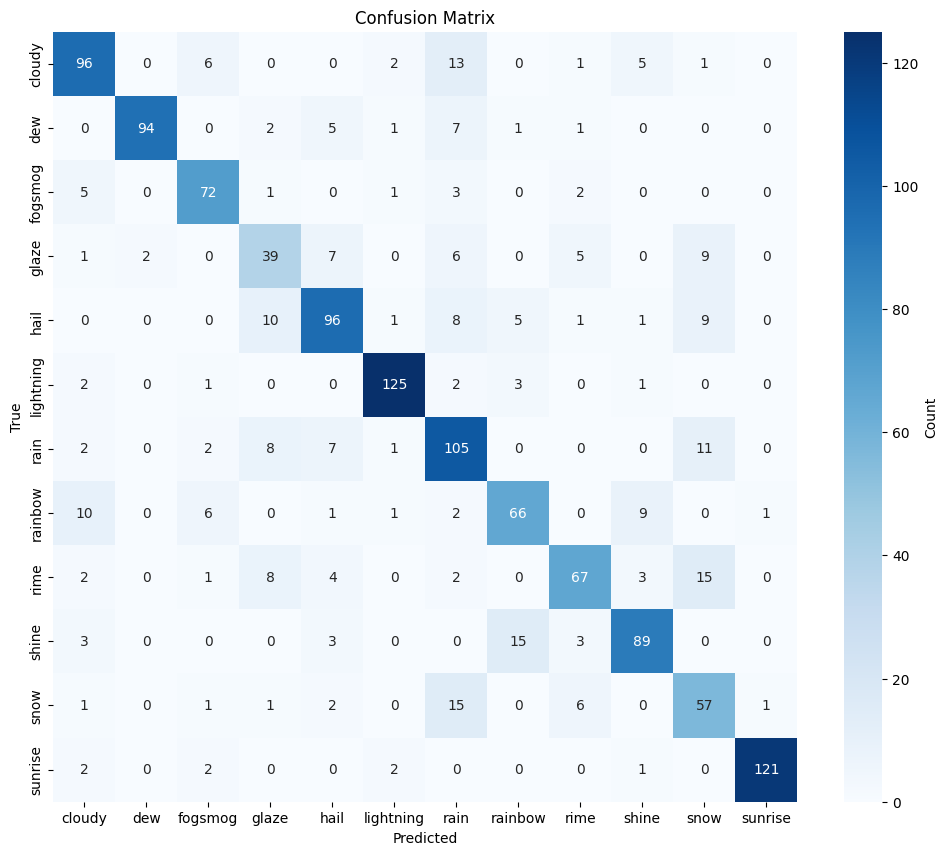

In [103]:
# Confusion Matrix oluşturma ve çizme
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# Test veri seti üzerinde tahminlerin ve gerçek etiketlerin toplanması
y_true = []
y_pred = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    
    # Sınıf indekslerini listeler içinde ekleyin
    y_true.append([np.argmax(label) for label in y])
    y_pred.append([np.argmax(pred) for pred in yhat])

# Listeleri numpy dizilerine çevirme
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

# Confusion Matrix oluşturma
conf_mat = confusion_matrix(y_true, y_pred)

# Sınıf isimleri
class_names = ['cloudy', 'dew', 'fogsmog', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'shine', 'snow', 'sunrise']

# Pandas DataFrame'e dönüştürme
conf_mat_df = pd.DataFrame(conf_mat, index=class_names, columns=class_names)

# Confusion Matrix'i çizme
plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat_df, annot=True, fmt='g', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()





# Realtime

In [110]:
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
import time

# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8
sequence_length = 1

# [10,1,224,224,3]-needed input shape
cap = cv2.VideoCapture(0)

# Süreyi beklemek için kullanılacak zaman aralığı (saniye cinsinden)
wait_interval = 0.1

# Önceki tahminin başlangıçta tanımlanması
previous_prediction = None

while cap.isOpened():
    # Read feed
    ret, frame = cap.read()

    # Resize the frame to match the model's expected sizing
    resized_frame = cv2.resize(frame, (256, 256))

    # Preprocess the frame for the model
    input_data = preprocess_input(np.expand_dims(resized_frame, axis=0))

    # Update the sequence with the preprocessed frame
    sequence.append(input_data)

    # Eğer belirlenen saniye aralığına ulaşıldıysa işlem yap
    if len(sequence) == sequence_length:
        sequence = np.array(sequence)

        # Remove the singleton dimension
        sequence = np.squeeze(sequence, axis=1)

        # Doğrudan modeli çağırın ve tahmin alın
        res = model.predict(sequence)
        current_prediction = class_names[np.argmax(res)]

        # Eğer önceki tahminden farklıysa güncelle
        if current_prediction != previous_prediction:
            print(current_prediction)

        # Güncelleme yapıldıktan sonra ekrandaki etiketi güncelle
        sentence = [current_prediction]

        # Görsel olarak etiketi belirtmek için metni ayarla
        text = ' '.join(sentence)
        font = cv2.FONT_HERSHEY_SIMPLEX
        org = (10, 30)
        font_scale = 1
        coloqr = (0, 0, 255)  # Kırmızı renk (BGR formatında)
        thickness = 2
        frame = cv2.putText(frame, text, org, font, font_scale, color, thickness, cv2.LINE_AA)

        # Show the frame
        cv2.imshow('OpenCV Feed', frame)

        # Bekleme süresi kadar uyku
        time.sleep(wait_interval)

        # Reset the sequence for the next predictions
        sequence = []

        # Güncelleme yapıldıktan sonra önceki tahmini güncelle
        previous_prediction = current_prediction

    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 63ms/step
sunrise
1/1 [==============================] - 0s 24ms/step
cloudy
1/1 [==============================] - 0s 21ms/step
fogsmog
1/1 [==============================] - 0s 21ms/step
lightning
1/1 [==============================] - 0s 23ms/step
fogsmog
1/1 [==============================] - 0s 23ms/step
lightning
1/1 [==============================] - 0s 21ms/step
fogsmog
1/1 [==============================] - 0s 26ms/step
cloudy
1/1 [==============================] - 0s 23ms/step
fogsmog
1/1 [==============================] - 0s 23ms/step
cloudy
1/1 [==============================] - 0s 23ms/step
lightning
1/1 [==============================] - 0s 23ms/step
fogsmog
1/1 [==============================] - 0s 23ms/step
lightning
1/1 [==============================] - 0s 22ms/step
fogsmog
1/1 [==============================] - 0s 24ms/step
cloudy
1/1 [==============================] - 0s 24ms/step
fogsmog
1/1 [==============================]

In [44]:
cap.release()
cv2.destroyAllWindows()